<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

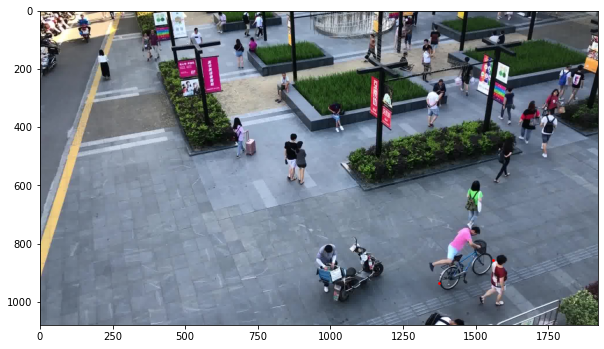

In [20]:
figure = plt.figure(figsize=(10, 10))
image = cv2.imread('lstdn_25_011.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#bike points
bike_back = np.array([1375, 937])
bike_front = np.array([1558, 858])
plt.scatter(bike_back[0], bike_back[1], color='r', s=3)
plt.scatter(bike_front[0],bike_front[1], color='r', s=3)

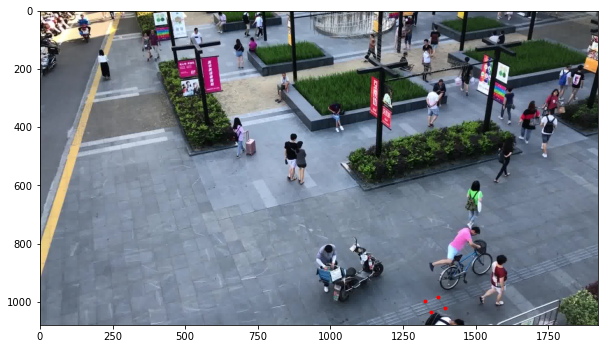

In [111]:
# We want to identify one of the square tiles and use that to determine a larger rectangle

figure = plt.figure(figsize=(10, 10))
image = cv2.imread('lstdn_25_011.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

square_bottom_right = np.array([1393, 1023])
square_bottom_left = np.array([1346, 1035])
square_top_left = np.array([1325, 999])
square_top_right = np.array([1371, 984])

plt.scatter(*square_bottom_right, color='r', s=8)
plt.scatter(*square_bottom_left, color='r', s=8)
plt.scatter(*square_top_left,color='r', s=8)
plt.scatter(*square_top_right, color='r', s=8)

In [112]:
inches_per_bike = 68
inch_per_meter = 39.37
meters_per_bike = inches_per_bike/inch_per_meter

bike_pixel_length = np.linalg.norm(bike_front - bike_back)
meters_per_pixel = meters_per_bike/bike_pixel_length

print('Meters/Pixel: {:.3f}'.format(meters_per_pixel))

Meters/Pixel: 0.009


In [142]:
# rectangle lengths in pixels
side += np.linalg.norm(square_bottom_right - square_bottom_left)
side += np.linalg.norm(square_top_left - square_top_right)
side += np.linalg.norm(square_top_left-square_bottom_left)
side += np.linalg.norm(square_top_right-square_bottom_right)
side /= 4
print('Side Length: {:.2f}'.format(side * meters_per_pixel))

Side Length: 0.58


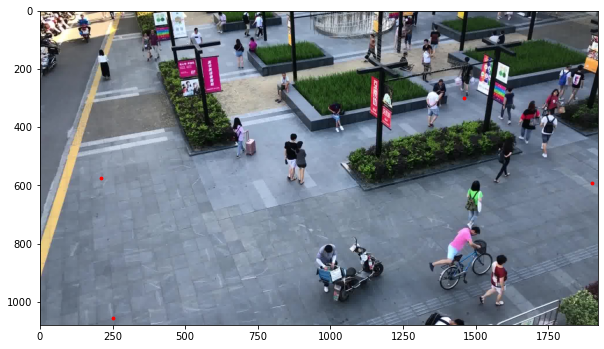

In [143]:
# ROI rectangle 12 x 35 (h x w of square tiles)
figure = plt.figure(figsize=(10, 10))
image = cv2.imread('lstdn_25_011.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
# path boundary
bottom_right = np.array([1900, 593])
bottom_left = np.array([250, 1055])
top_left = np.array([210, 576])
top_right = np.array([1460, 298])

plt.scatter(*bottom_right, color='r', s=8)
plt.scatter(*bottom_left, color='r', s=8)
plt.scatter(*top_left,color='r', s=8)
plt.scatter(*top_right, color='r', s=8)

In [144]:
side

66.86850417525666

In [145]:
world_bottom_left = np.array([0, 12 * side * meters_per_pixel])
world_top_left = np.array([0,0])
world_top_right = np.array([35 * side*meters_per_pixel, 0])
world_bottom_right = np.array([35 * side*meters_per_pixel, 12 * side*meters_per_pixel])

In [146]:
# Get perspective transform
image_rect = np.float32([bottom_left, top_left, top_right, bottom_right])
world_rect = np.float32([world_bottom_left, world_top_left, world_top_right, world_bottom_right])
matrix_cam2world = cv2.getPerspectiveTransform(image_rect, world_rect)
matrix_cam2world10x = cv2.getPerspectiveTransform(image_rect, world_rect*10)

In [147]:
np.savetxt('lstn_matrix_cam2world.txt', matrix_cam2world)

In [140]:
image_rect = np.float32([bottom_left, top_left, top_right, bottom_right]).reshape(-1,1,2)
result = cv2.perspectiveTransform(image_rect, matrix_cam2world).squeeze()

In [141]:
result

array([[3.1703763e-16, 7.2850437e+00],
       [4.4548740e-16, 3.5638992e-15],
       [2.1248045e+01, 2.0887413e-15],
       [2.1248045e+01, 7.2850437e+00]], dtype=float32)